In [1]:
#Importing Libraries
import requests 
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
#Fetching Data from the API
url = 'https://api2.binance.com/api/v3/ticker/24hr'
output = requests.get(url)
data = output.json()

In [3]:
#Putting data into DataFrame
pdframe = pd.DataFrame(data)

In [4]:
#Exploring the Dataset to display the first few rows of the DataFrame
print(pdframe.head(5))

    symbol  priceChange priceChangePercent weightedAvgPrice prevClosePrice  \
0   ETHBTC  -0.00001000             -0.016       0.06336667     0.06345000   
1   LTCBTC   0.00007400              2.352       0.00316408     0.00314500   
2   BNBBTC   0.00019400              2.345       0.00840962     0.00827300   
3   NEOBTC   0.00000530              1.785       0.00030112     0.00029700   
4  QTUMETH   0.00010400              7.531       0.00147793     0.00138100   

    lastPrice      lastQty    bidPrice       bidQty    askPrice  ...  \
0  0.06344000   0.59270000  0.06343000  45.22940000  0.06344000  ...   
1  0.00322000   0.40500000  0.00322000   5.39300000  0.00322100  ...   
2  0.00846600   0.56400000  0.00846600   1.40800000  0.00846700  ...   
3  0.00030220   1.38000000  0.00030200   1.38000000  0.00030230  ...   
4  0.00148500  33.00000000  0.00147500  92.60000000  0.00148500  ...   

    openPrice   highPrice    lowPrice           volume    quoteVolume  \
0  0.06345000  0.06376000

In [5]:
# Check the data types and non-null counts
print(pdframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   symbol              2266 non-null   object
 1   priceChange         2266 non-null   object
 2   priceChangePercent  2266 non-null   object
 3   weightedAvgPrice    2266 non-null   object
 4   prevClosePrice      2266 non-null   object
 5   lastPrice           2266 non-null   object
 6   lastQty             2266 non-null   object
 7   bidPrice            2266 non-null   object
 8   bidQty              2266 non-null   object
 9   askPrice            2266 non-null   object
 10  askQty              2266 non-null   object
 11  openPrice           2266 non-null   object
 12  highPrice           2266 non-null   object
 13  lowPrice            2266 non-null   object
 14  volume              2266 non-null   object
 15  quoteVolume         2266 non-null   object
 16  openTime            2266

In [6]:
# Describe the numerical columns
print(pdframe.describe())

           openTime     closeTime       firstId        lastId         count
count  2.266000e+03  2.266000e+03  2.266000e+03  2.266000e+03  2.266000e+03
mean   1.690339e+12  1.690425e+12  1.535312e+07  1.535977e+07  6.646444e+03
std    6.036922e+08  6.036922e+08  8.458528e+07  8.460891e+07  6.706538e+04
min    1.689574e+12  1.689661e+12 -1.000000e+00 -1.000000e+00  0.000000e+00
25%    1.689574e+12  1.689661e+12 -1.000000e+00 -1.000000e+00  0.000000e+00
50%    1.690816e+12  1.690903e+12  1.540977e+06  1.541630e+06  3.535000e+02
75%    1.690817e+12  1.690903e+12  9.801293e+06  9.803108e+06  2.443000e+03
max    1.690817e+12  1.690903e+12  3.182043e+09  3.182748e+09  2.961589e+06


## Data Cleaning and Transformation 

In [7]:
#making the timestamp more readable
pdframe['timestamp'] = pd.to_datetime(pdframe['closeTime'], unit='ms')

In [8]:
print(pdframe.head(5))

    symbol  priceChange priceChangePercent weightedAvgPrice prevClosePrice  \
0   ETHBTC  -0.00001000             -0.016       0.06336667     0.06345000   
1   LTCBTC   0.00007400              2.352       0.00316408     0.00314500   
2   BNBBTC   0.00019400              2.345       0.00840962     0.00827300   
3   NEOBTC   0.00000530              1.785       0.00030112     0.00029700   
4  QTUMETH   0.00010400              7.531       0.00147793     0.00138100   

    lastPrice      lastQty    bidPrice       bidQty    askPrice  ...  \
0  0.06344000   0.59270000  0.06343000  45.22940000  0.06344000  ...   
1  0.00322000   0.40500000  0.00322000   5.39300000  0.00322100  ...   
2  0.00846600   0.56400000  0.00846600   1.40800000  0.00846700  ...   
3  0.00030220   1.38000000  0.00030200   1.38000000  0.00030230  ...   
4  0.00148500  33.00000000  0.00147500  92.60000000  0.00148500  ...   

    highPrice    lowPrice           volume    quoteVolume       openTime  \
0  0.06376000  0.06299

In [9]:
#Converting numeric strings to numeric values
numeric_cols = ['lastPrice', 'bidPrice', 'askPrice', 'highPrice', 'lowPrice', 'volume', 'quoteVolume']
pdframe[numeric_cols] = pdframe[numeric_cols].apply(pd.to_numeric)


In [10]:
print(pdframe.head(5))

    symbol  priceChange priceChangePercent weightedAvgPrice prevClosePrice  \
0   ETHBTC  -0.00001000             -0.016       0.06336667     0.06345000   
1   LTCBTC   0.00007400              2.352       0.00316408     0.00314500   
2   BNBBTC   0.00019400              2.345       0.00840962     0.00827300   
3   NEOBTC   0.00000530              1.785       0.00030112     0.00029700   
4  QTUMETH   0.00010400              7.531       0.00147793     0.00138100   

   lastPrice      lastQty  bidPrice       bidQty  askPrice  ... highPrice  \
0   0.063440   0.59270000  0.063430  45.22940000  0.063440  ...  0.063760   
1   0.003220   0.40500000  0.003220   5.39300000  0.003221  ...  0.003257   
2   0.008466   0.56400000  0.008466   1.40800000  0.008467  ...  0.008513   
3   0.000302   1.38000000  0.000302   1.38000000  0.000302  ...  0.000310   
4   0.001485  33.00000000  0.001475  92.60000000  0.001485  ...  0.001516   

   lowPrice       volume  quoteVolume       openTime      closeTime 

## Performing Analysis

In [11]:
#The trading pair with the highest 24-hour volume
max_volume_pair = pdframe.loc[pdframe['volume'].idxmax(), 'symbol']
print(f"The trading pair with the highest 24-hour volume is {max_volume_pair}.")

The trading pair with the highest 24-hour volume is PEPEUSDT.


In [12]:
#Calculating the average price change percentage for all trading pairs
pdframe['priceChangePercent'] = pdframe['priceChangePercent'].astype(float)
average_percentage_price_change = pdframe['priceChangePercent'].mean()
print(f"The average percentage change in price for all trading pairs is {average_percentage_price_change:.2f}%.")

The average percentage change in price for all trading pairs is -0.72%.


In [13]:
#Top Trading Pairs by 24-hour Volume
top_5_pairs = pdframe.nlargest(5, 'volume')[['symbol', 'volume']]
print("Top 5 Trading Pairs by 24-hour Volume:")
print(top_5_pairs)

Top 5 Trading Pairs by 24-hour Volume:
        symbol        volume
2213  PEPEUSDT  1.690632e+13
2218   PEPETRY  5.022964e+12
1419  SHIBUSDT  3.507935e+12
1420  SHIBBUSD  4.939836e+11
1908  BTTCUSDT  3.641743e+11


In [14]:
#Percantage change of the Highest and Lowest 24-hour Price

highest_pr_change_pair = pdframe.nlargest(1, 'priceChangePercent')[['symbol', 'priceChangePercent']]
lowest_pr_change_pair = pdframe.nsmallest(1, 'priceChangePercent')[['symbol', 'priceChangePercent']]

print(f"Highest 24-hour Price Change Percentage: {highest_pr_change_pair.iloc[0]['priceChangePercent']:.2f}% for {highest_pr_change_pair.iloc[0]['symbol']}")
print(f"Lowest 24-hour Price Change Percentage: {lowest_pr_change_pair.iloc[0]['priceChangePercent']:.2f}% for {lowest_pr_change_pair.iloc[0]['symbol']}")


Highest 24-hour Price Change Percentage: 20.98% for ALPACABTC
Lowest 24-hour Price Change Percentage: -10.13% for VGXUSDT


In [15]:
#Average and Median 24-hour Trading Volume
avg_vol = pdframe['volume'].mean()
median_vol = pdframe['volume'].median()

print(f"Average 24-hour Trading Volume is: {avg_vol:.2f}")
print(f"Median 24-hour Trading Volume is: {median_vol:.2f}")

Average 24-hour Trading Volume is: 12188809920.72
Median 24-hour Trading Volume is: 18692.67


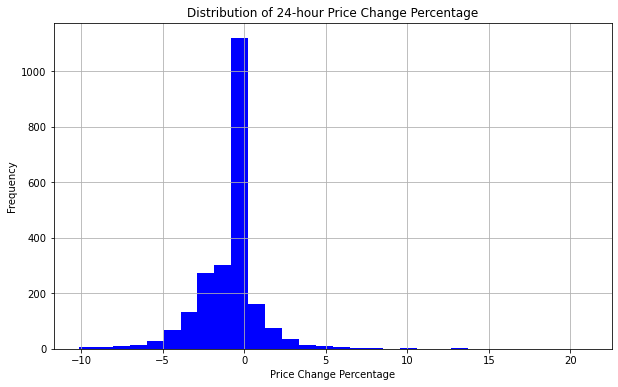

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(pdframe['priceChangePercent'], bins=30, color='blue')
plt.xlabel('Price Change Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of 24-hour Price Change Percentage')
plt.grid(True)
plt.show()